# Discrete logarithm problem

This problem arises in many fields in cryptography and this is why it is worth having a quick look on it. Roughly speaking is the problem of finding $k$ such that $a^k$(mod $p$)=$n$ where we know $a$ and $p$. This may seem a super simple problem (if we don't work in the modulo operation but in plain real numbers we use the logarithm for that) but as we will see finding $k$ is a brute force task. 


First of all we have to choose a  prime number $p$ 

In [1]:
from crypt import GeneratePrimeGeneratorPair
from crypt import PrimesSieveEratosthenes

from random import seed
seed(2)

bits = 16
# p is a large prime number
p, g = GeneratePrimeGeneratorPair(bits)

print(f"We choose a prime and a generator:\np={p}\ng={g}")
print(f"Generating all primes smaller than {1<<bits}")
primes = list(PrimesSieveEratosthenes(1<<bits))

We choose a prime and a generator:
p=61981
g=27893
Generating all primes smaller than 65536


We also need a generator for such a prime

We then know that $g$ is going to generate all the numbers in the field. We know that since $p$ is prime, all numbers from 1 to $p-1$ are invertible and so we can generate all numbers by powering $g$. Just as a matter of check, we find the number of invertible elements:

In [2]:
from crypt import InvertibleNumbers

invertible = len(InvertibleNumbers(p))
print("Number of inverible elements is {} wich should be {} if p is prime".format(invertible, p-1))

Number of inverible elements is 61980 wich should be 61980 if p is prime


We require to calculate large integer powers, for instance 23456^99999 (mod $p$), this will blow our computer!. One way to calculate this could be multiplying 23456 by itself 99999 times and apply the operation (mod $p$) every time we multiply but this turns out to be still slow. A better way is the fast powering algorithm (see [An Introduction to Mathematical Cryptography](https://www.springer.com/gp/book/9781493917105)). 

In [3]:
from crypt import fastPowering

Now we choose the secret, we will take $k=1234$. So $g^k$(mod p) is:

In [4]:
k = 1234
gkp = fastPowering(g, k, p)

print(gkp)

31482


In [5]:
print("g = {}\nk = {}\ng^k = a = {}".format(g, k, gkp))

g = 27893
k = 1234
g^k = a = 31482


Now the attacker receives the quantity $a=g^k$(mod p) and the task is to check for which $k$ we get a. Now by brute force mode let's try to find all the values $k$ that satisfy $a=g^k$(mod p)

In [6]:
for i in range(1, p-1):
    a = fastPowering(g,i,p)
    if a==gkp:
        print("k={}, a={}".format(i, a))

k=1234, a=31482


We found the right one!. This case has been fast but as the prime number becomes larger this time increases a lot. In order to see the difficulty of the problem let me plot all the values of $a$ for different $k$s

<Figure size 432x288 with 0 Axes>

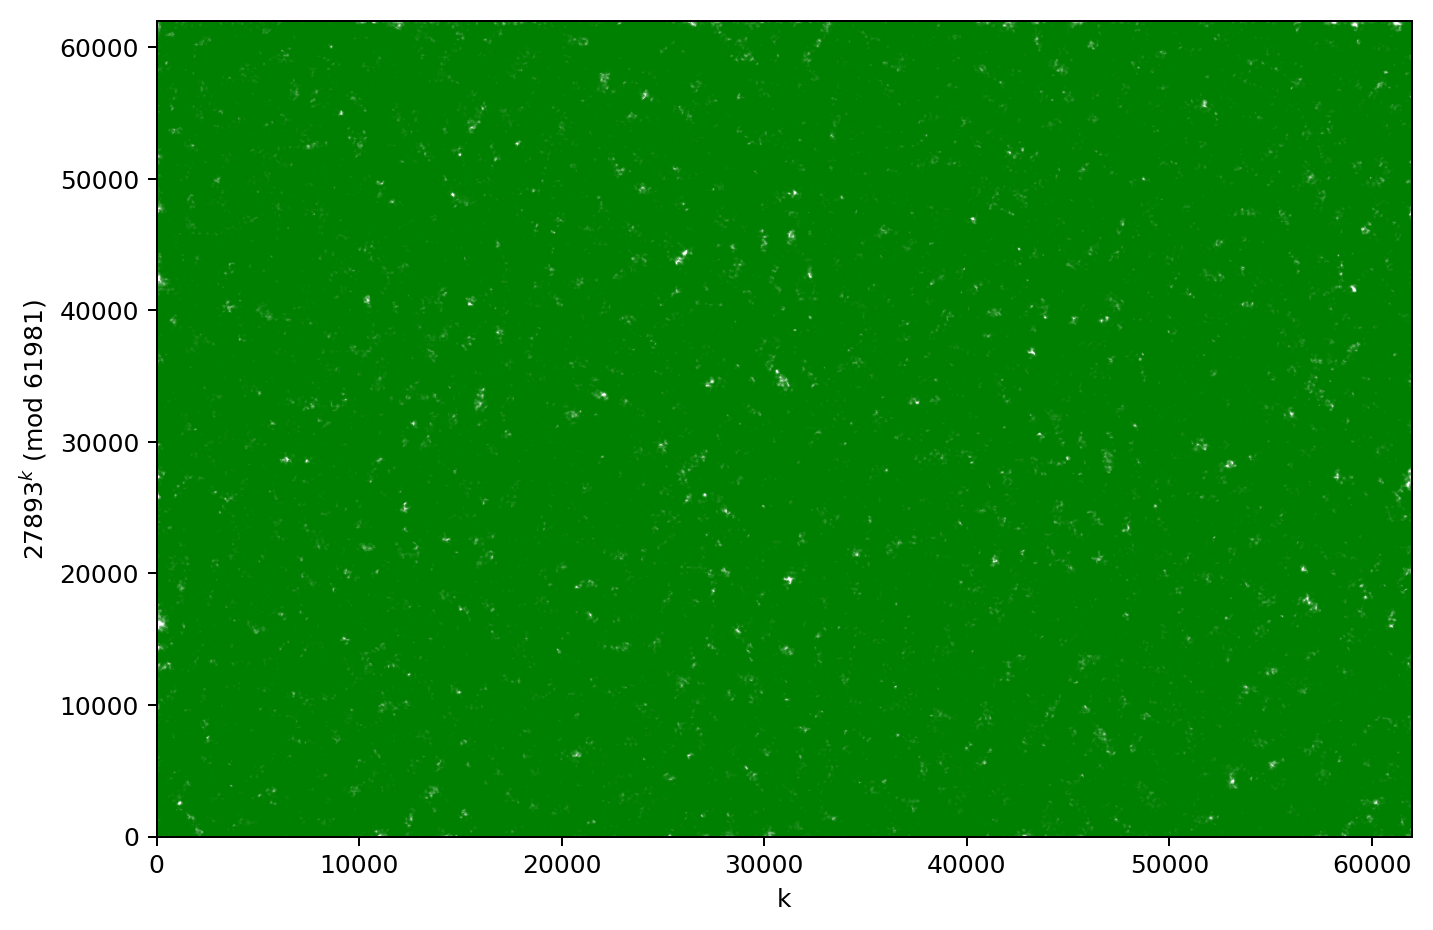

In [7]:
x, y = [], []

for i in range(1, p-1):
    x.append(i)
    y.append(fastPowering(g,i,p))

import matplotlib.pyplot as plt
%matplotlib inline

plt.clf()
fig=plt.figure(dpi = 180, figsize=(9,6))

plt.scatter(x, y, c="g", alpha=0.5, marker=r'$\bigstar$',
            label="")
plt.xlabel("k")
plt.ylabel("${}^k$ (mod ${}$)".format(g, p))
#plt.legend(loc='upper right')
plt.ylim((0, p))
plt.xlim((0, p-1))
plt.show()

As you can see this seems random... In fact it is unpredictable. Let me show a zoom of this graph for values of $k$ between 2000 and 3000 and with lines to see the randomicity.

<Figure size 432x288 with 0 Axes>

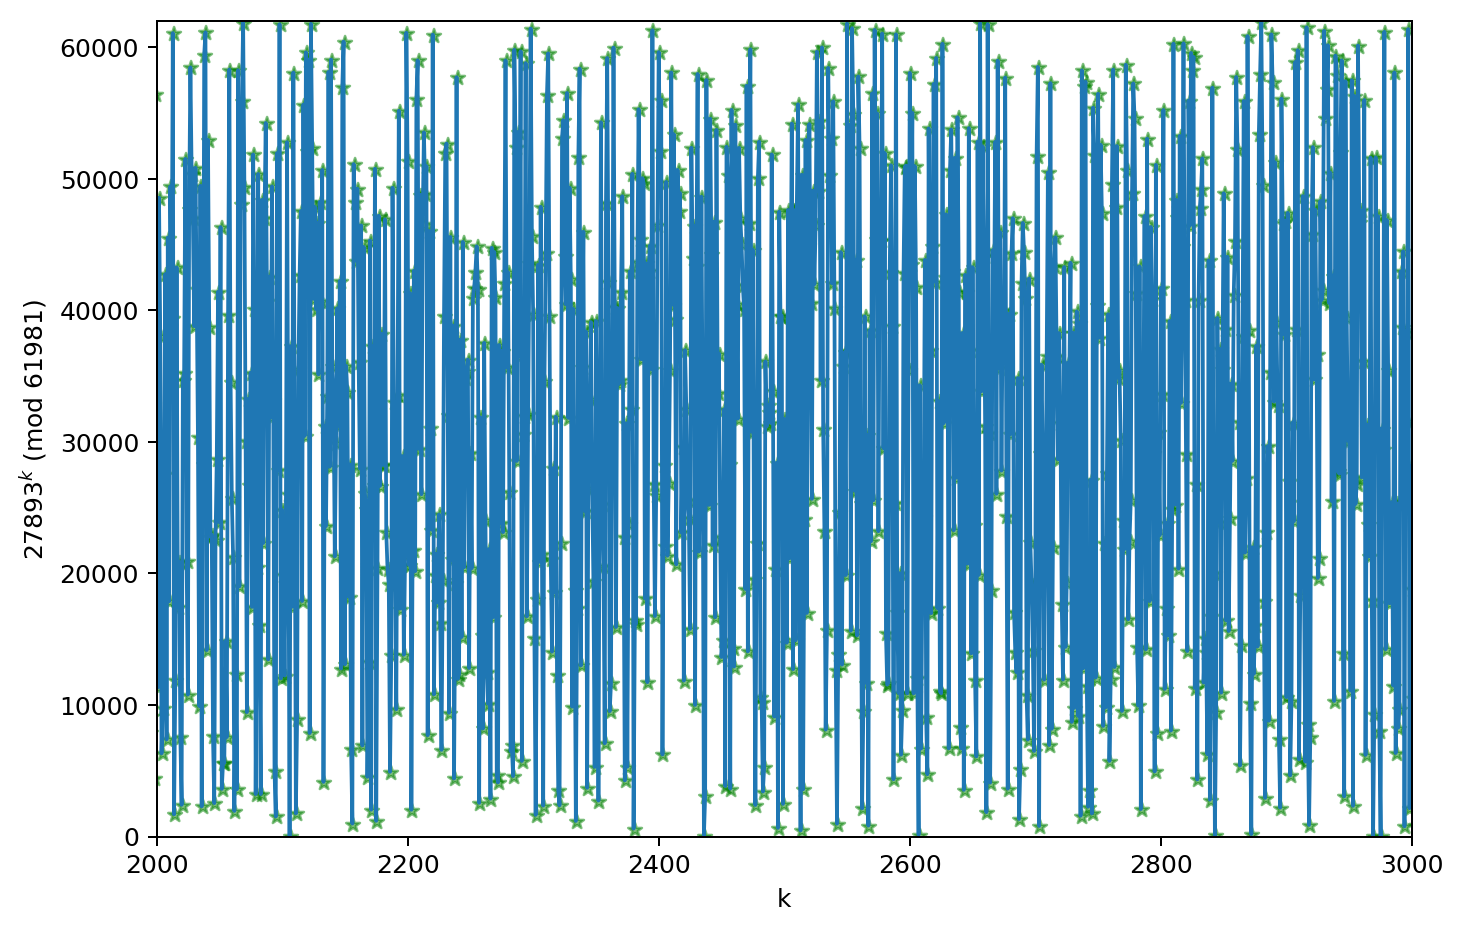

In [8]:
plt.clf()
fig=plt.figure(dpi = 180, figsize=(9,6))

plt.scatter(x, y, c="g", alpha=0.5, marker=r'$\bigstar$',
            label="")
plt.plot(x, y)
plt.xlabel("k")
plt.ylabel("${}^k$ (mod ${}$)".format(g, p))
#plt.legend(loc='upper right')
plt.ylim((0, p))
plt.xlim((2000, 3000))
plt.show()

This is very chaotic and thus the attacker has to options, either check from beginning to end to find the value of $k$ or sample values of $k$ randomly to check. Hard task to perform for large $p$.

The solution $n$ is not unique, i.e. there is more than one $k$ such that $g^k$(mod $p$)=$a$. We can see that from Fermat's litte therorem $g^{p-1}=1$(mod $p$) for $p$ prime, hence if $k$ is a solution then $k+\phi(p-1)$ is also a solution, where $\phi$ is an natural number.

Let's check this with same $g=627$ and $p=941$ exploring $k$ until 99999.

In [9]:
a = 627
p = 941

x = list()
y = list()

for i in range(0, 99999):
    x.append(i)
    y.append(fastPowering(a,i,p))

Let's see for which $k$s we get the same number $n$

In [10]:
#define the function to calculate the next k with same n
k2 = lambda x: k + x*(p-1)

for i in range(1,8):
    k = k2(i)
    print("k={}, n={}".format(x[i], y[i]))

k=1, n=627
k=2, n=732
k=3, n=697
k=4, n=395
k=5, n=182
k=6, n=253
k=7, n=543


# Diffie-Hellman key exchange

[Diffie-Hellman key exchange](https://en.wikipedia.org/wiki/Diffie%E2%80%93Hellman_key_exchange) is a method of securely exchanging cryptographic keys over a public channel and was one of the first public-key protocols as originally conceptualized by Ralph Merkle and named after Whitfield Diffie and Martin Hellman. Diffie-Hellman is one of the earliest practical examples of public key exchange implemented within the field of cryptography. The algorithm is best described in page 66 of [An introduction to mathematical cryptography](https://www.springer.com/gp/book/9781441926746).

We begin with Alice and bob agreeing in a prime number $p$ and a generator of the multiplicative field $g$:

In [11]:
bits = 32
p, g = GeneratePrimeGeneratorPair(bits)
print(f"We choose a prime and a generator:\np={p}\ng={g}")

We choose a prime and a generator:
p=4290013253
g=2913626632


Alice and bob choose a secret value $a$ and $b$ respectively:

In [12]:
from random import randrange

a, b = randrange(2, p), randrange(2, p)

print("Secret for Alice a={}".format(a))
print("Secret for Bob b={}".format(b))

Secret for Alice a=1290476836
Secret for Bob b=3280849483


Alice computes $A=g^a$ and Bob $B=g^b$

In [13]:
A = fastPowering(g, a, p)
B = fastPowering(g, b, p)

print("Secret power for Alice A={}".format(A))
print("Secret power for Bob B={}".format(B))

Secret power for Alice A=259050968
Secret power for Bob B=665695979


Now Alice sends Bob A and Bob sends Alice B using an insecure channel. Alice then computes $B^a$ and Bob $A^b$ so that they have the same key

In [14]:
sk_Alice = fastPowering(B, a, p)
sk_Bob = fastPowering(A, b, p)

print("Final secret key for Alice {}".format(sk_Alice))
print("Final secret key for Bob {}".format(sk_Bob))

Final secret key for Alice 2023642578
Final secret key for Bob 2023642578


Now they've been able to calculate the same key secretly. How is that so? The only information that an attacker can infer from looking into communication is $p$ and $g$ from the agreement and the shared values $A$, $B$. They never share the exponents $a$ or $b$, the ones that will be difficult to guess according to the discrete logarithm problem (if $p$ is sufficiently large).

DH is used mainly to agree a private key for two parties where the comunications can be compromised.

# How hard it is to break the Diffie Hellman keys? (the discrete logarithm problem)

Modern cryptography is based on making the probability to break a code very small. i.e. there is no perfectly secure encryption scheme (like one time pad that we will see later) but instead the proability of breaking it is very low. 

To make an example of this I will explain from the point of view of an attacker trying to break the Diffie Hellman keys. Alice and Bob communicate in the way we have seen in the previous section and Carol is an eavesdroper (can see all communications between Alice and Bob), so Carol knows $p$, $g$, $A$ and $B$. The task of Carol is to find the secret key $g^{ab}\pmod(p)$. To do so, she first needs to find the secret values $a$ and $b$ so the task is find $a$ and $b$ such that

$$A=g^a\pmod{p}$$
$$B=g^b\pmod{p}$$

Carol then, just have to look at all possible values of $a$ and $b$ (this is, $p$-1 elements) and check the inequalities. Let's code a function that finds this and work with a super small prime


In [24]:
bits = 4
p, g = GeneratePrimeGeneratorPair(bits)
print(f"the prime number is of {bits} bits:\ni.e. a number between {1<<(bits-1)} and {1<<bits}")
print(f"\nRandomly chosen prime and generator:\np={p}\ng={g}")

the prime number is of 4 bits:
i.e. a number between 8 and 16

Randomly chosen prime and generator:
p=13
g=11


In [25]:
from random import randrange

def break_dh(A, p, g, max_iter=5000):
    print(f"Randomly checking values of a in the range {1}, {p}")
    i=0
    while i<max_iter:
        a = randrange(1, p)
        i+=1
        if fastPowering(g, a, p) == A:
            return a

In [26]:
%%time

a = randrange(1, p)
A = fastPowering(g, a, p)

print(f"Alice has chosen a={a} as secret key, then A={A}")
a_inferred = break_dh(A, p, g)

assert a_inferred==a, "Something went wrong"
print(f"a={a}, a_inferred={a_inferred}\n")

Alice has chosen a=4 as secret key, then A=3
Randomly checking values of a in the range 1, 13
a=4, a_inferred=4

CPU times: user 634 µs, sys: 0 ns, total: 634 µs
Wall time: 542 µs


In [15]:
bits = 8
p, g = GeneratePrimeGeneratorPair(bits)
print(f"the prime number is of {bits} bits:\ni.e. a number between {1<<(bits-1)} and {1<<bits}")
print(f"\nRandomly chosen prime and generator:\np={p}\ng={g}")


the prime number is of 8 bits:
i.e. a number between 128 and 256

Randomly chosen prime and generator:
p=239
g=210


In [16]:
from random import randrange

def break_dh(A, p, g, max_iter=5000):
    print(f"Randomly checking values of a in the range {1}, {p}")
    i=0
    while i<max_iter:
        a = randrange(1, p)
        i+=1
        if fastPowering(g, a, p) == A:
            return a

In [17]:
%%time

a = randrange(1, p)
A = fastPowering(g, a, p)

print(f"Alice has chosen a={a} as secret key, then A={A}")
a_inferred = break_dh(A, p, g)

assert a_inferred==a, "Something went wrong"
print(f"a={a}, a_inferred={a_inferred}\n")

Alice has chosen a=81 as secret key, then A=167
Randomly checking values of a in the range 1, 239
a=81, a_inferred=81

CPU times: user 6.8 ms, sys: 961 µs, total: 7.76 ms
Wall time: 7.83 ms


So Carol can easily reconstruct the secret key in this case. Let's make numbers... The prime number chosen is of $n$ bits and so the value she is trying to guess ($a$) is also of $n$ bits. Think that each bit has a probability half of being 0 or 1, therefore the number of combinations of zeroes and ones in an $n$ string is $2^n$. This is saying that the space search to guess $a$ increases exponentially as the size of the key $n$ increases (haven't mentioned before but $n$ is known as the security parameter).

Let's try to break the code with more bits

In [41]:
bits = 21
p, g = GeneratePrimeGeneratorPair(bits)
print(f"the prime number is of {bits} bits:\ni.e. a number between {1<<(bits-1)} and {1<<bits}")
print(f"\nRandomly chosen prime and generator:\np={p}\ng={g}")

the prime number is of 21 bits:
i.e. a number between 1048576 and 2097152

Randomly chosen prime and generator:
p=1768639
g=523175


In [42]:
%%time

a = randrange(1, p)
A = fastPowering(g, a, p)

print(f"Alice has chosen a={a} as secret key, then A={A}")
a_inferred = break_dh(A, p, g, max_iter=99999999)

assert a_inferred==a, "Something went wrong"
print(f"a={a}, a_inferred={a_inferred}\n")

Alice has chosen a=1658150 as secret key, then A=502209
Randomly checking values of a in the range 1, 1768639
a=1658150, a_inferred=1658150

CPU times: user 9.1 s, sys: 14 ms, total: 9.12 s
Wall time: 9.13 s


see that we have doubled the security parameter and the time for guessing has grown a lot (not linearly). Again, this is pure probability, we have no guarantees that at the first trial of a super large $n$ Carol will find the secret $a$. The larger the $n$ the less probable will Carol find the secret key by randomly guessing.

Computational security. **The concrete approach definition** see [An introduction to modern cryptography](https://www.crcpress.com/Introduction-to-Modern-Cryptography/Katz-Lindell/p/book/9781466570269): A scheme is (t,$\epsilon$) secure if any adversary running at most during time $t$ suceeds to break the code within probability at most $\epsilon$. 

Say a supercomputer can do $c$ key test per unit time, then at time $t$ it will have run $ct$ operatinons. The probability of guessing the key is then

$$P(t, \epsilon)= \frac{ct}{2^n}$$.

This definition is used in practice when implementing a security scheme on a certain hardware. We can say for instance that a certain encryption scheme can be broken with at most probability $\epsilon$ when running on a 2GHz computer for 1h (loosely speaking).

Another definition of computational security is the one of the **asimptotic approach**. A scheme is secure if any probabilistic polynomial time adversary suceeds in breaking the scheme with at most negligible probability. Again see [An introduction to modern cryptography](https://www.crcpress.com/Introduction-to-Modern-Cryptography/Katz-Lindell/p/book/9781466570269) for more concrete details.